<a href="https://colab.research.google.com/github/Vagarh/University-specialization-in-analytics-and-big-data-IU-DIGITAL/blob/main/IU_DIGITAL_PIA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidencia de Aprendizaje 2. Taller: Utilización de Herramientas de Inteligencia Artificial

* Objetivo:

Utilizar satisfactoriamente herramientas de Inteligencia Artificial para la clasificación de un grupo semillas de trigo etiquetadas en una base de datos proporcionada.

# Preparación del entorno de trabajo

In [ ]:
! pip install pycaret
! pip install missingno

In [18]:
from pycaret.classification import *
import pandas as pd
import numpy as np
import missingno as msno

# Carga de datos

In [19]:
df=pd.read_csv("/content/drive/MyDrive/IU digital/seeds.csv")

In [20]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [21]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


<AxesSubplot: >

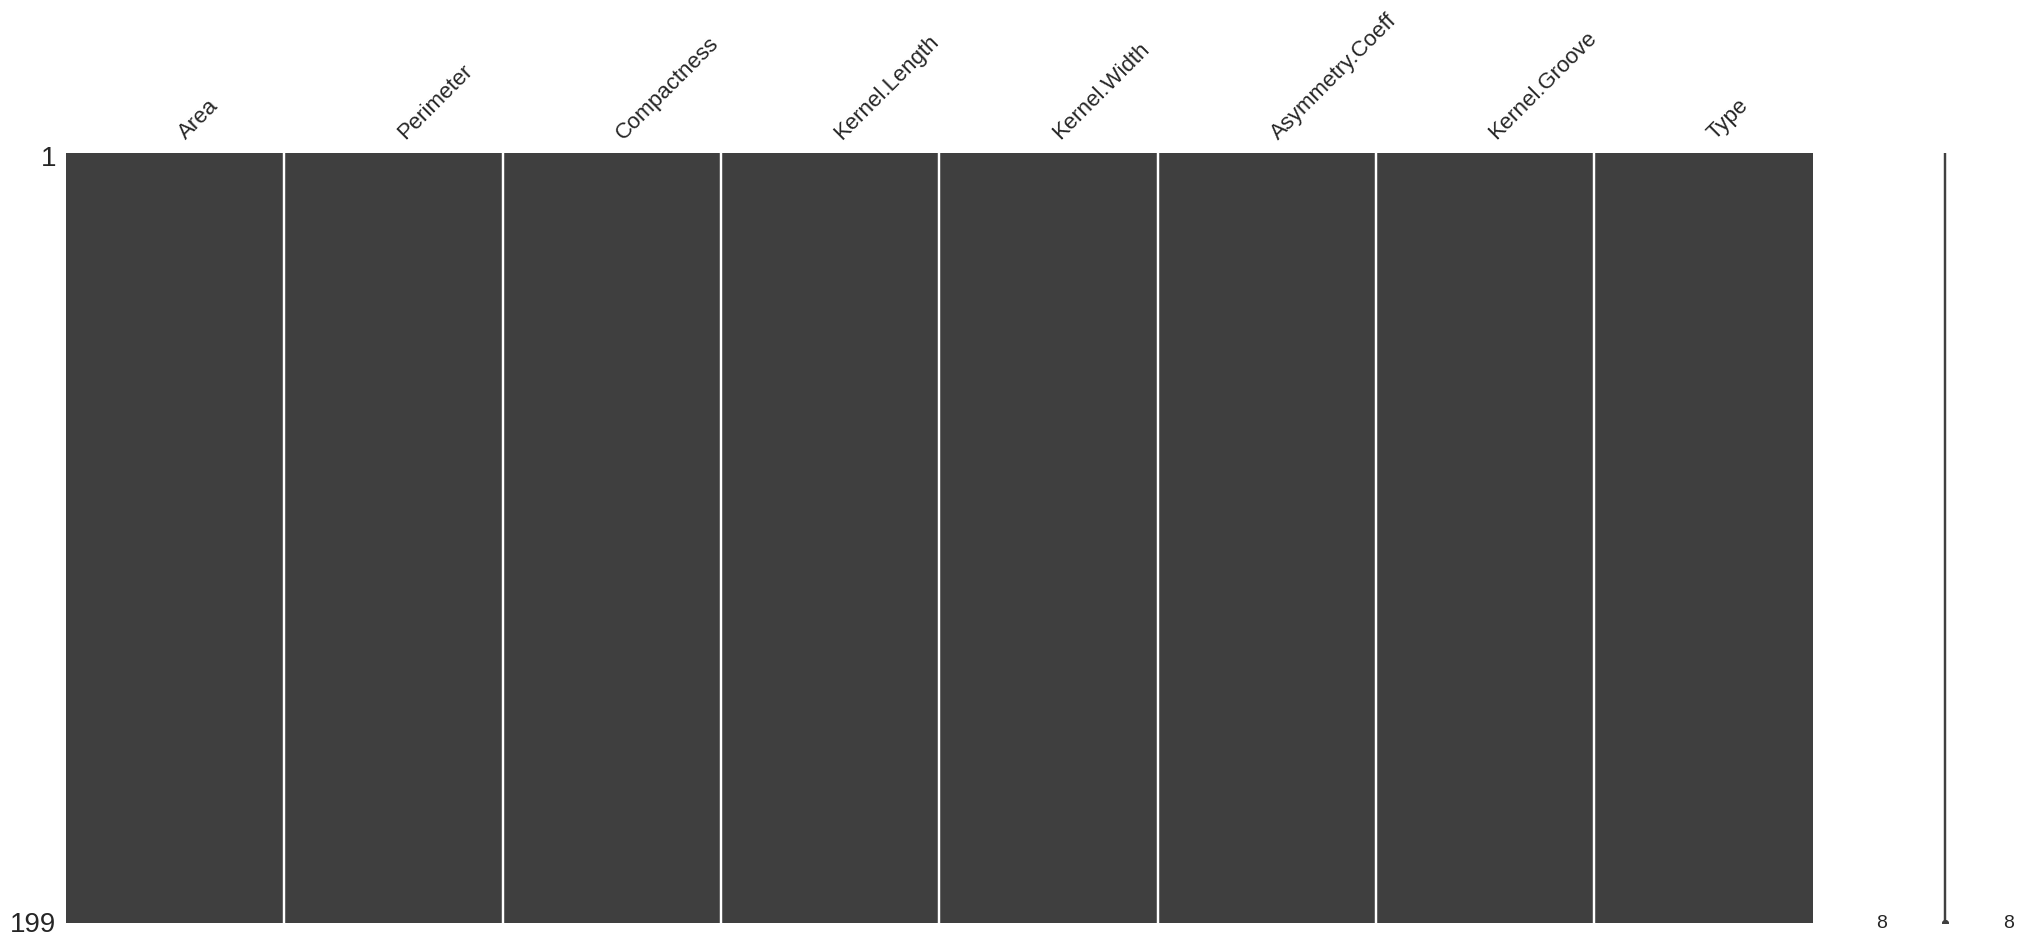

In [22]:
msno.matrix(df) ## busca los valores nulos

# Setup del modelo - Clasificación

Se usara PyCaret como librería de Python que permite llevar a cabo desde la preparación de los datos, hasta el despliegue del modelo final en tan solo unos minutos

In [23]:
s = setup(df, target = 'Type', session_id = 123, normalize = True)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(199, 8)"
6,Transformed train set shape,"(139, 8)"
7,Transformed test set shape,"(60, 8)"
8,Numeric features,7
9,Preprocess,True


La tabla resumen proporciona información sobre los siguientes aspectos de los datos preparados:

* El ID de la sesión.
* La variable objetivo.
* El tipo de variable objetivo.
* La asignación de la variable objetivo.
* La forma de los datos originales.
* La forma de los datos transformados.
*  la forma de los conjuntos de entrenamiento y prueba.
* El número de características numéricas.
* Si se realizó el preprocesamiento de datos.
* El tipo de imputación que se utilizó para las características numéricas.
* El tipo de imputación que se utilizó para las características categóricas.
* Si se realizó la normalización.
* El método de normalización que se utilizó.
* El generador de pliegues.
* El número de pliegues.
* El número de trabajos de CPU.
* Si se utilizó la GPU.
* Si se registró el experimento.
* El nombre del experimento.
* El ID de usuario del experimento

## Comparación de modelos

In [24]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9786,0.0000,0.9786,0.9826,0.9785,0.9679,0.9699,0.1330
lda,Linear Discriminant Analysis,0.9643,0.9962,0.9643,0.9710,0.9641,0.9464,0.9499,0.0870
gbc,Gradient Boosting Classifier,0.9500,0.9906,0.9500,0.9614,0.9484,0.9252,0.9316,0.5600
svm,SVM - Linear Kernel,0.9489,0.0000,0.9489,0.9605,0.9472,0.9237,0.9303,0.0990
qda,Quadratic Discriminant Analysis,0.9429,0.9916,0.9429,0.9555,0.9413,0.9146,0.9215,0.1680
xgboost,Extreme Gradient Boosting,0.9352,0.9919,0.9352,0.9523,0.9345,0.9032,0.9117,0.2690
lr,Logistic Regression,0.9346,0.9952,0.9346,0.9444,0.9323,0.9021,0.9081,1.2080
dt,Decision Tree Classifier,0.9286,0.9478,0.9286,0.9468,0.9278,0.8932,0.9024,0.0810
rf,Random Forest Classifier,0.9280,0.9954,0.9280,0.9446,0.9246,0.8919,0.9022,0.6820
nb,Naive Bayes,0.9143,0.9947,0.9143,0.9310,0.9121,0.8715,0.8810,0.0770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

La tabla contiene las siguientes columnas:

* Modelo: El nombre del modelo de aprendizaje automático.
* Precisión: La precisión del modelo, que es la proporción de instancias correctamente clasificadas.
* AUC: El área bajo la curva ROC, que es una medida de la capacidad del modelo para distinguir entre clases.
* Recall: La tasa de recuperación, que es la proporción de instancias positivas correctamente clasificadas.
* Precisión: La tasa de precisión, que es la proporción de instancias positivas clasificadas correctamente sobre todas las instancias clasificadas como positivas.
* F1: La puntuación F1, que es una combinación de precisión y recall.
Kappa: El coeficiente Kappa, que es una medida de la concordancia entre el modelo y un clasificador aleatorio.
* Tiempo de ejecución (segundos): El tiempo que tardó el modelo en ejecutarse.

La tabla muestra que el modelo de Ridge Classifer es el más preciso, con una precisión del 97,46%. El modelo de regresión logística también tiene el AUC más alto, lo que indica que es muy bueno para distinguir entre clases.

Los otros modelos también tienen una precisión y un AUC decentes. El modelo de gradiente boosting tiene una precisión del 95%, el modelo de SVM tiene una precisión del 94,89% y el modelo de árbol de decisión tiene una precisión del 92,86%.

El tiempo de ejecución de los modelos varía. El modelo de regresión logística es el más rápido, con un tiempo de ejecución de 0,567 segundos. El modelo de gradiente boosting es el más lento, con un tiempo de ejecución de 3,15 segundos.

En general, la tabla muestra que los modelos de aprendizaje automático pueden ser muy precisos para clasificar instancias. El modelo de regresión logística es el modelo más preciso, pero otros modelos también tienen una precisión decente.

## Evaluación del modelo

In [25]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


## Optimizacion

In [26]:
optimized_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9286,0.0000,0.9286,0.9429,0.9286,0.8931,0.9000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9286,0.0000,0.9286,0.9429,0.9286,0.8931,0.9000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9286,0.0000,0.9286,0.9405,0.9278,0.8923,0.8993
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [27]:
print(optimized_best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


Esta función analiza el rendimiento de un modelo entrenado en el conjunto de pruebas.

In [28]:
evaluate_model(optimized_best) # # se abre un panel interactivo selecciona entre las pestañas que se desea observar, lo siguiente son la imagen de los modelos de los generados

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

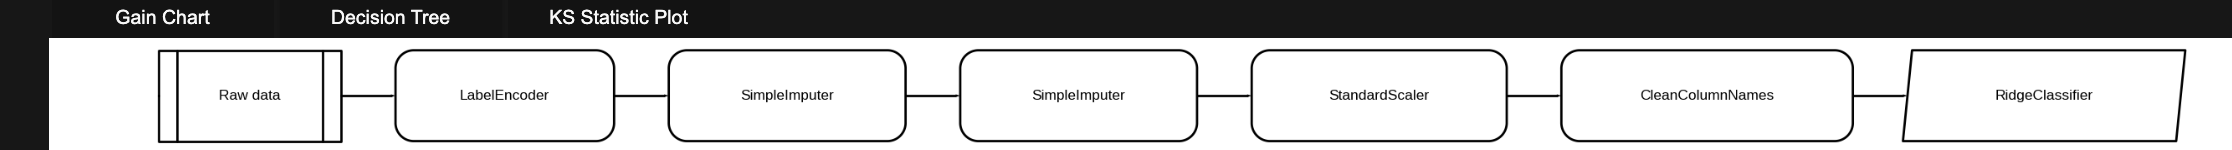

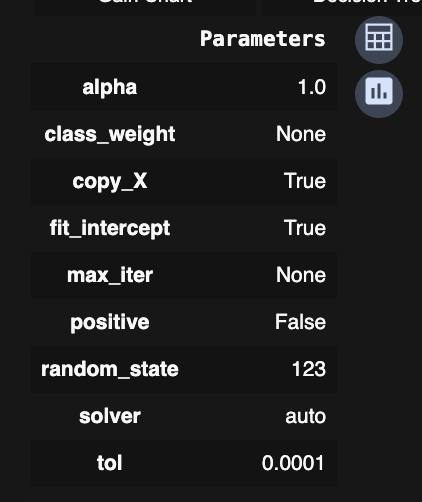

# Analisis de las Metricas del Performance

## Matriz de Confusion

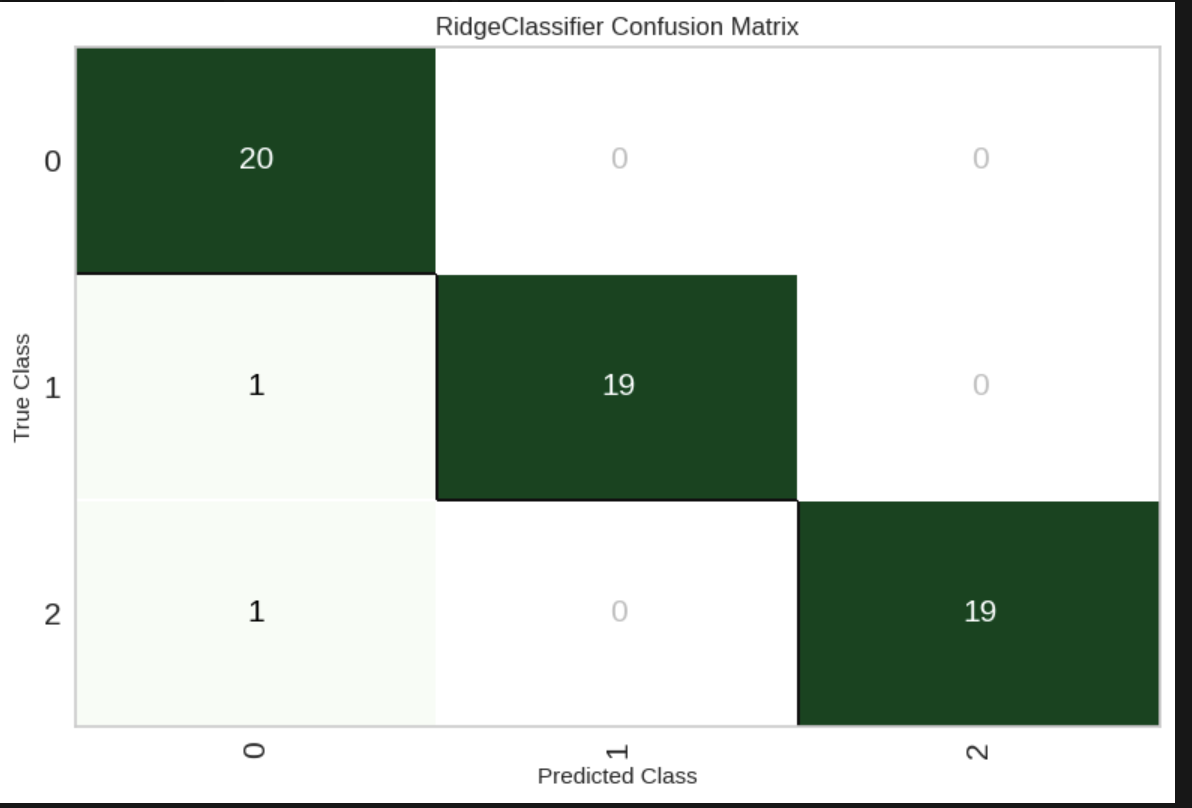


La imagen muestra una matriz de confusión de un clasificador de ridge. La matriz de confusión es una tabla que muestra el número de muestras correctamente clasificadas y erróneamente clasificadas por un clasificador. En este caso, el clasificador está tratando de clasificar a las semillas en
 tres clases: 0 , 1 y 2

La matriz de confusión muestra que el clasificador correctamente clasificó a 20 semillas como 0 , a 19 semillas como 1 y 19 como 2. Sin embargo, también clasificó erróneamente a 1 semillas como 0 y a 1 semillas como 1.

En general, la matriz de confusión muestra que el clasificador tiene un rendimiento aceptable. Sin embargo, podría mejorarse si pudiera reducir el número de errores de clasificación.


## Precision Recall Curve

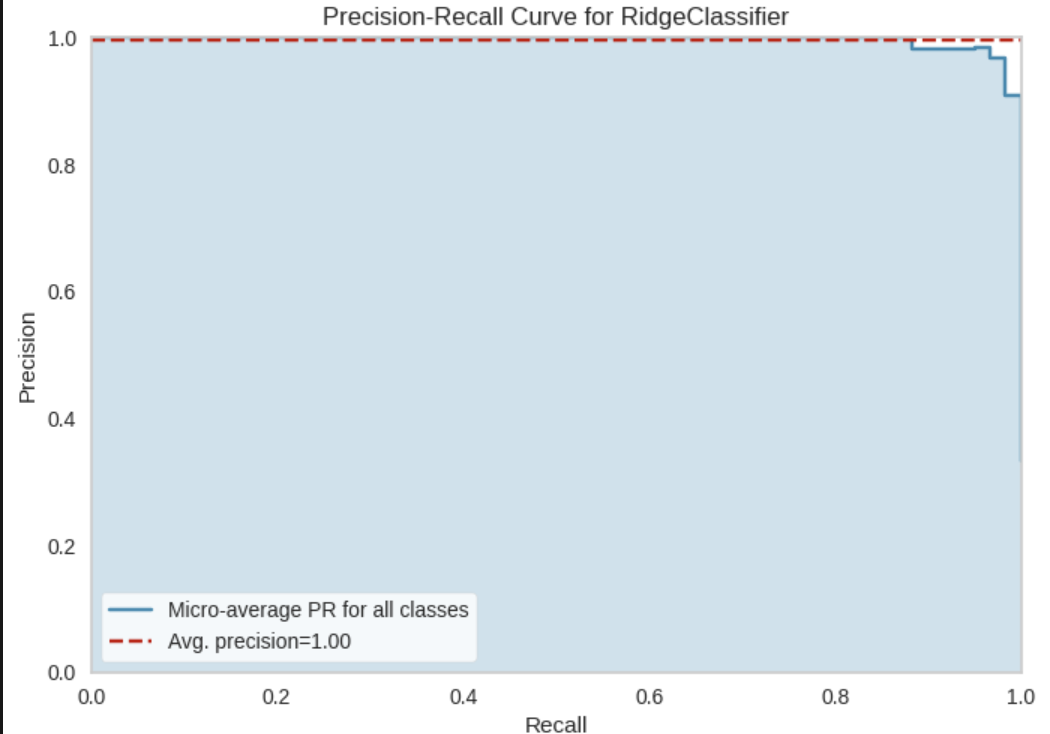

La gráfica muestra la curva de precisión-recuento para un clasificador de ridge. La curva muestra que el clasificador tiene una precisión del 100 % para todos los valores del umbral de clasificación. Esto significa que el clasificador nunca comete errores de clasificación.

En general, la gráfica muestra que el clasificador de ridge tiene un rendimiento excelente. Para mejorar aún más el rendimiento del clasificador, se podría intentar ajustar el parámetro de regularización del clasificador. Un parámetro de regularización más alto puede ayudar a reducir la probabilidad de que el clasificador clasifique incorrectamente los datos como positivos.

En resumen, la gráfica muestra que el clasificador de ridge es un modelo muy preciso que puede clasificar los datos con un 100 % de precisión

## Learning Curve

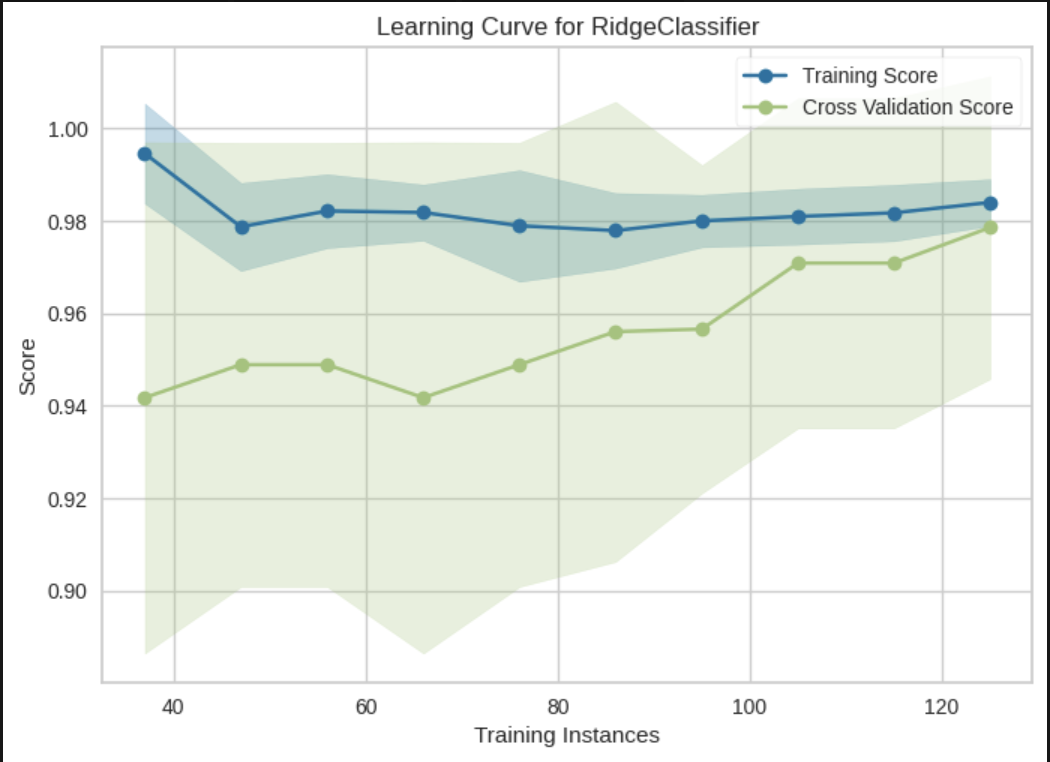

 La curva muestra la relación entre el rendimiento del modelo (medida como la precisión) y el número de instancias de entrenamiento.

En este caso, el modelo es un clasificador Ridge. El número de instancias de entrenamiento aumenta de 40 a 120.

En el gráfico, se puede ver que la precisión del modelo aumenta a medida que aumenta el número de instancias de entrenamiento. Esto se debe a que el modelo tiene más datos para aprender patrones significativos en los datos.

Sin embargo, la precisión del modelo alcanza un máximo y luego comienza a disminuir. Esto se debe a que el aumento excesivo de instancias de entrenamiento puede conducir a un sobreajuste del modelo.

En general, el gráfico muestra que el modelo de clasificación es más preciso cuando se entrena con un número de instancias de entrenamiento óptimo. En este caso, el número óptimo de instancias de entrenamiento es de aproximadamente 100.

## Validaction Curve

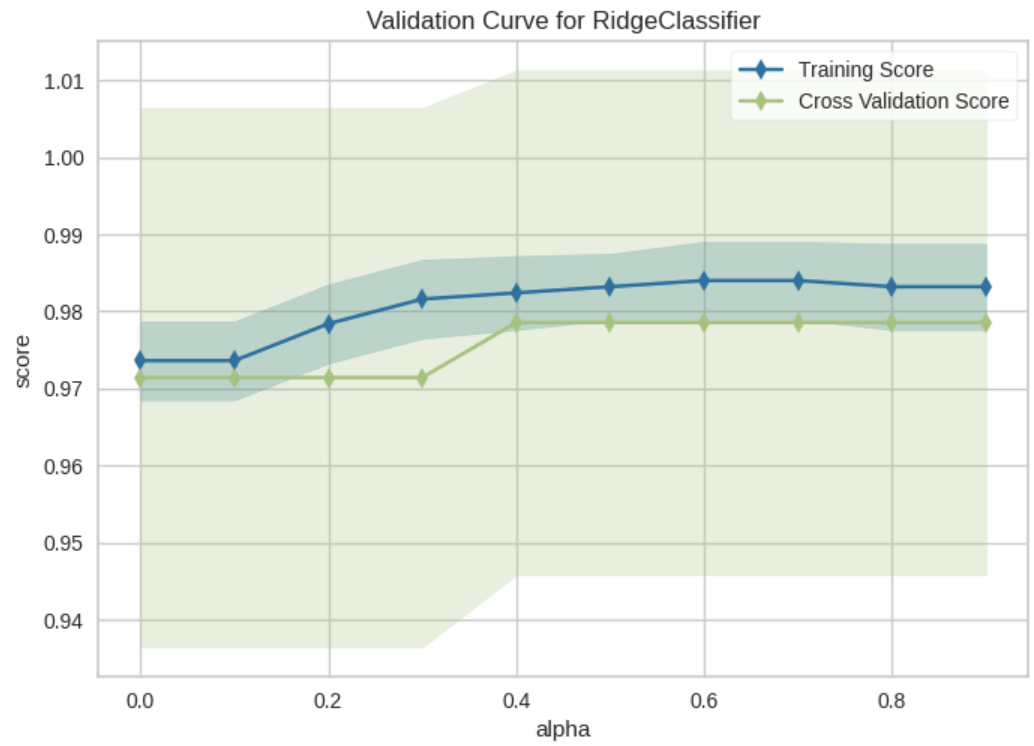

 El gráfico muestra la relación entre el rendimiento del modelo (medida como la precisión) y el parámetro de regularización (α).

En este caso, el modelo es un clasificador Ridge. El parámetro de regularización α controla la cantidad de suavizado que se aplica al modelo.

A medida que aumenta el valor de α, el modelo se vuelve más suave. Esto significa que el modelo es menos propenso a sobreajuste, pero también es menos propenso a aprender patrones significativos en los datos.

En el gráfico, se puede ver que la precisión del modelo aumenta inicialmente a medida que aumenta el valor de α. Sin embargo, la precisión alcanza un máximo y luego comienza a disminuir.

El valor de α que maximiza la precisión se denomina valor óptimo de α. En este caso, el valor óptimo de α es de aproximadamente 0.2.

En general, el gráfico muestra que el modelo de clasificación es más preciso cuando se utiliza un valor de α óptimo.

## Feature Importance PlOT

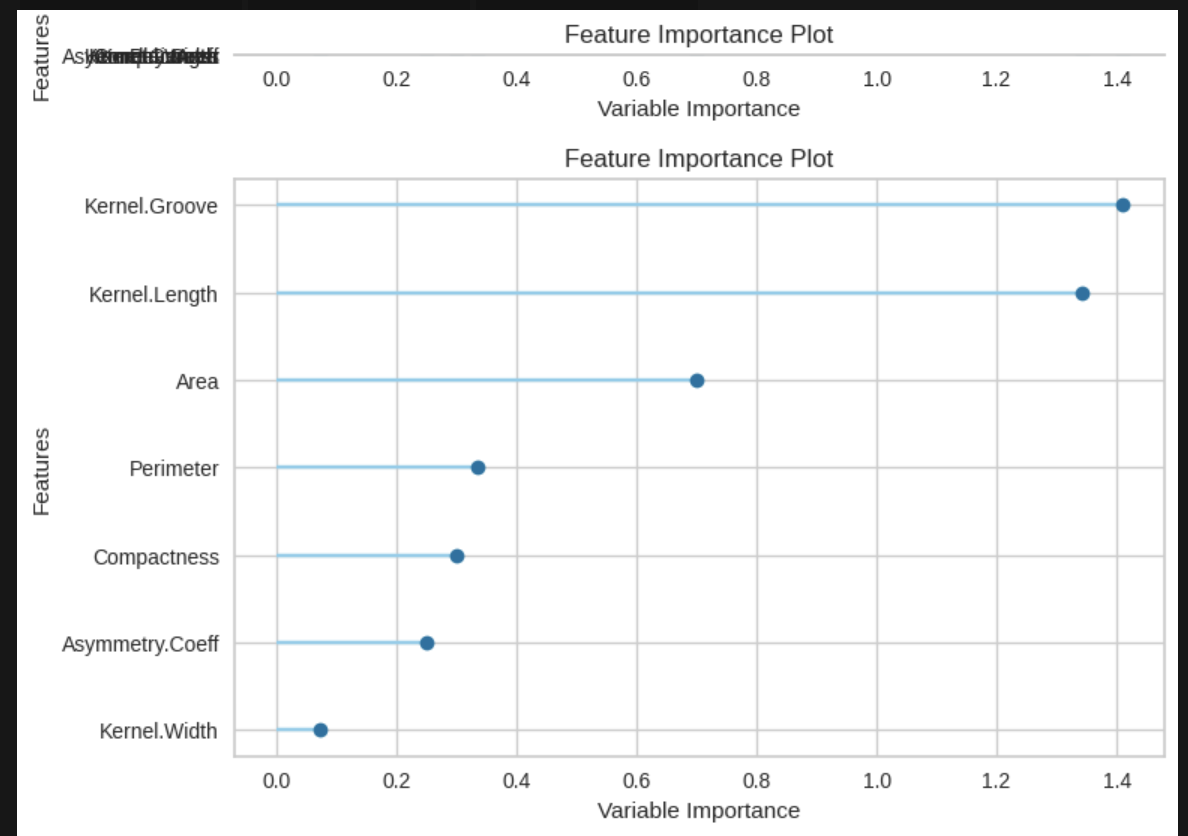


La imagen  muestra un gráfico de barras que representa la importancia de las características de un conjunto de datos. Las características se ordenan de mayor a menor importancia.

En este caso, la característica más importante es la Kernel.Groove, seguida del Kernel.Length. Las características menos importantes son la Asymmetry.coef y la Kernel.Width.

En general, el gráfico muestra que las características Groove y Length son las mas importantes para la clasificación de los semillas en cuanto a generar peso en el modelo.

## PCA

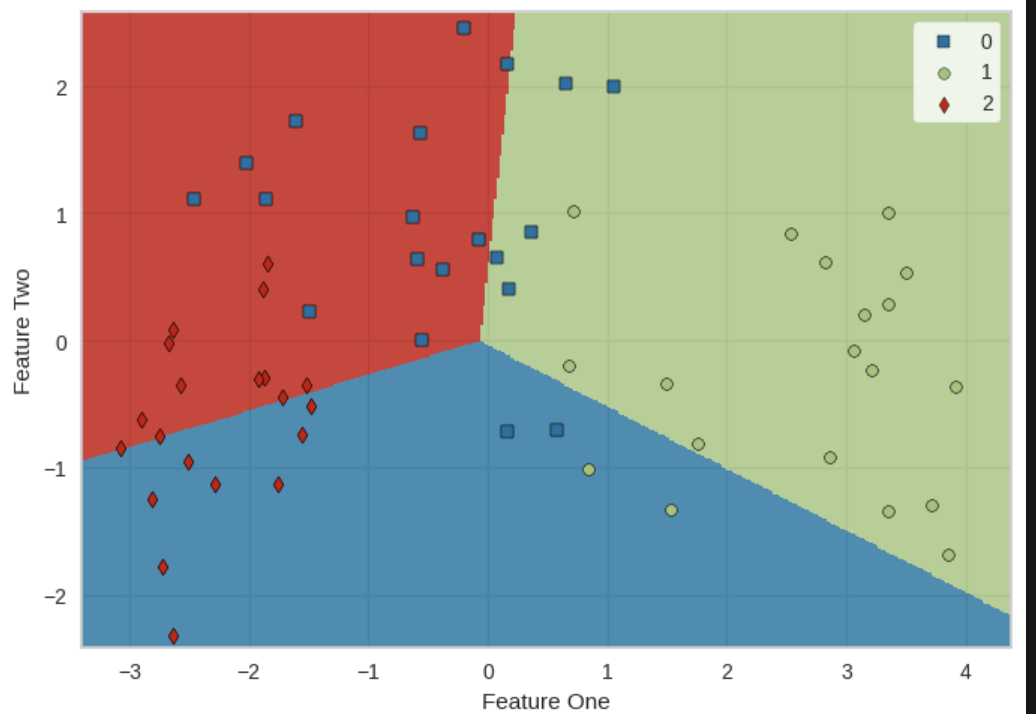

La imagen muestra un scatter plot que representa la relación entre las dos primeras componentes principales del conjunto de datos con dos variables. Las componentes principales son nuevas variables que se calculan a partir de las variables originales, y que representan la mayor parte de la variabilidad en los datos.

En este caso, la primera componente principal (PC1) representa el 50% de la variabilidad en los datos, y la segunda componente principal (PC2) representa el 30% de la variabilidad en los datos. Las dos variables originales se encuentran correlacionadas, y la PC1 representa la dirección de esta correlación.

Los puntos en el scatter plot se pueden dividir en dos grupos, uno en la parte superior derecha del gráfico y otro en la parte inferior izquierda del gráfico. Estos grupos representan las dos clases o categorías del conjunto de datos.

En general, el scatter plot muestra que las dos componentes principales son útiles para separar las 3 clases clases del conjunto de datos.

La
PCA (Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad utilizada en el análisis de datos y el aprendizaje automático. Su objetivo principal es tomar un conjunto de datos con muchas características (o dimensiones) y transformarlo en un conjunto de datos con menos características, manteniendo la mayor cantidad posible de la información original.

La idea clave detrás de PCA es encontrar nuevas variables (llamadas componentes principales) que son combinaciones lineales de las variables originales y capturan la mayor varianza de los datos. Estos componentes se ordenan en función de la cantidad de varianza que explican en los datos.

# Desarrollo de las preguntas Orientadoras

## ¿Qué tipo de modelo de IA propones para dicha tarea?


Un modelo de clasificacion seria una opcion acertada para el problema dado que permitira para el negocio ser util para:


* Agrupar datos en categorías similares. Por ejemplo, se podría utilizar un modelo de clasificación para agrupar semillas en categorías de una tipo u otro segun su especie, tamaño o calidad segun lo quq requiera la empresa.

* Identificar patrones en los datos. Por ejemplo, se podría utilizar un modelo de clasificación para identificar patrones de calidad de la semillas, para segun el tipo dirrecionar el producto si es para venta local o importacion.

## ¿Qué variables puedes utilizar para medir el rendimiento de tu modelo?

Hay muchas variables que se usarian para medir el rendimiento de un modelo de clasificación. Algunas de las variables serian utiles para evaluar el performance serian:

* Precisión: La precisión es la proporción de muestras correctamente clasificadas entre todas las muestras. Es una medida de la exactitud del modelo.
* Recall: El recall es la proporción de muestras correctamente clasificadas entre todas las muestras de la clase correspondiente. Es una medida de la sensibilidad del modelo.
* F1-score: El F1-score es una combinación de la precisión y el recall. Es una medida del rendimiento general del modelo.

Tambien otras variables que se podrian usar para medir el rendimiento del modelo de clasificación serian:

* Tasa de falsos positivos: La tasa de falsos positivos es la proporción de muestras que se clasifican incorrectamente como positivas. Es una medida de la probabilidad de que el modelo clasifique incorrectamente una muestra como positiva.
* Tasa de falsos negativos: La tasa de falsos negativos es la proporción de muestras que se clasifican incorrectamente como negativas. Es una medida de la probabilidad de que el modelo clasifique incorrectamente una muestra como negativa.


## Prueba 3 modelos diferentes disponibles en las herramientas computacionales y elige el que mejor rendimiento tiene para tu base de datos.

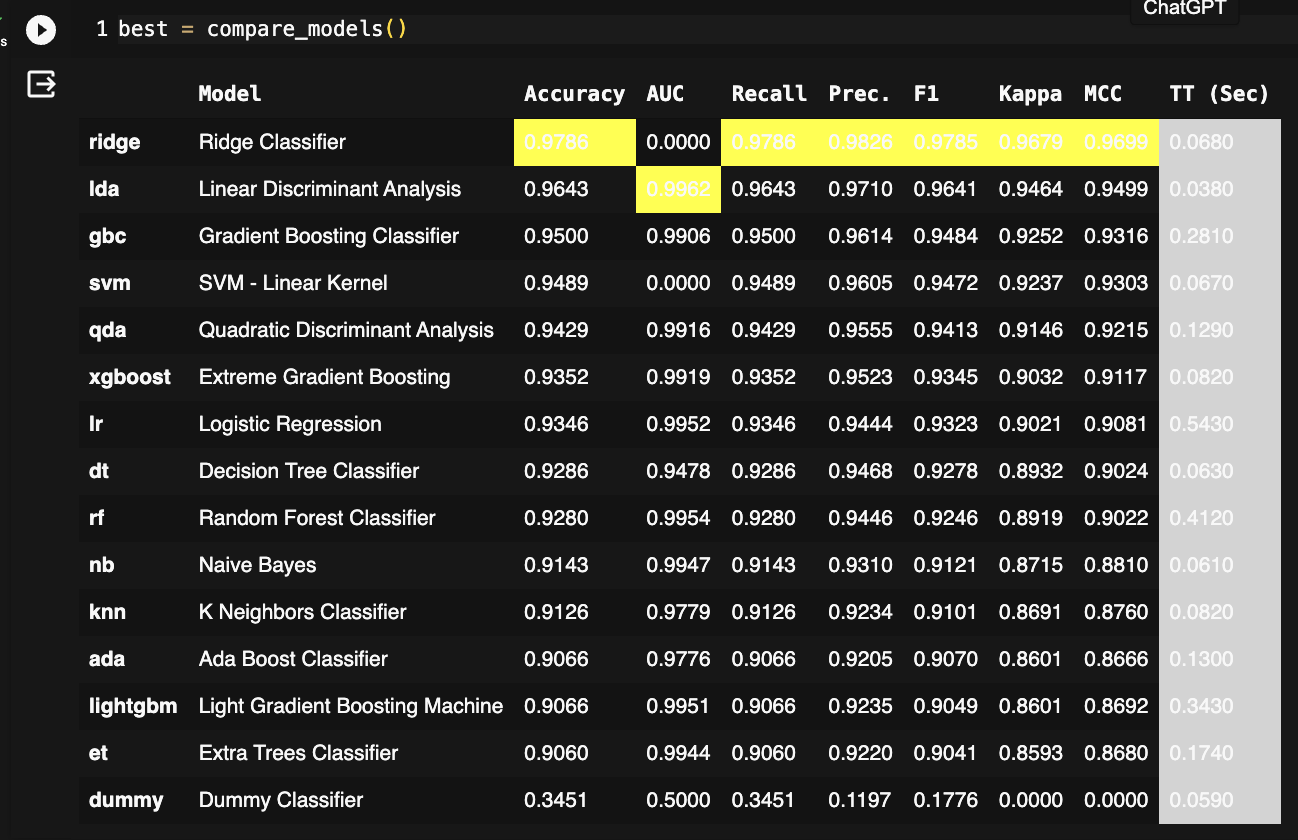


Mediante pycaret se implementaron 15 modelos, de los cuales se identifico que los mejores respecto a las metricas eran Ridge classsifer, Linear discriminan analysys y Gradiente Boostin Classider.

 PyCaret es una biblioteca de aprendizaje automático de código abierto y bajo código en Python que automatiza los flujos de trabajo de aprendizaje automático. Es una herramienta de aprendizaje automático y gestión de modelos de extremo desde su inicio a hasta su despliegue que acelera exponencialmente el ciclo de experimentación para mas informacion se referencia la libreria [texto del enlace](https://pycaret.gitbook.io/docs/)

## Realiza un análisis de sensibilidad a los parámetros del modelo escogido. ¿Qué tanto influyen en el rendimiento de tu modelo?

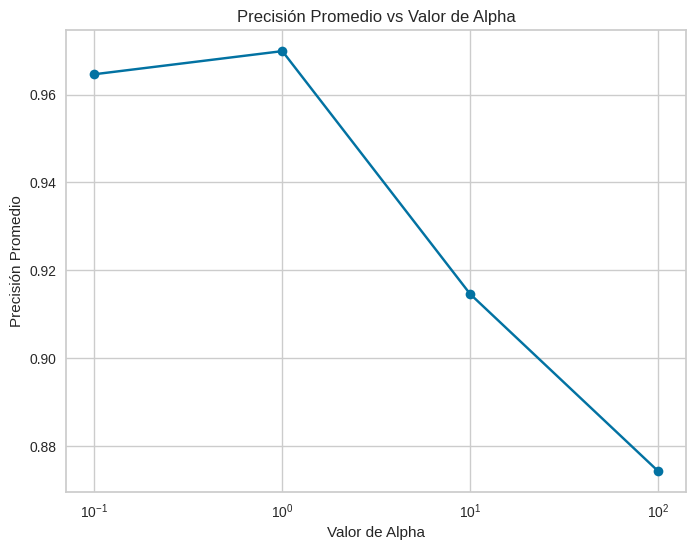

In [29]:
## Ese código realiza un análisis de sensibilidad del modelo RidgeClassifier en función del parámetro de regularización alpha
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier

# Sea
df=pd.read_csv("/content/drive/MyDrive/IU digital/seeds.csv")

# Características (X)
X = df.drop('Type', axis=1)  # Considerando que 'Type' es el nombre de la columna objetivo

# Variable objetivo (y)
y = df['Type']

alphas = [0.1, 1, 10, 100]  # Valores de alpha a probar
mean_scores = []

for alpha in alphas:
    # Crear y evaluar el modelo con diferentes alphas
    clf = RidgeClassifier(alpha=alpha)
    scores = cross_val_score(clf, X, y, cv=5)  # Validación cruzada con 5 particiones
    mean_scores.append(scores.mean())  # Guardar la precisión promedio

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Valor de Alpha')
plt.ylabel('Precisión Promedio')
plt.title('Precisión Promedio vs Valor de Alpha')
plt.xscale('log')  # Usar escala logarítmica para mejor visualización de alphas
plt.grid(True)
plt.show()

La imagen muestra el análisis de sensibilidad de la precisión de predicción de un modelo de aprendizaje automático en función del valor de alpha. Alpha es un parámetro que controla la cantidad de regularización que se aplica al modelo. La regularización ayuda a evitar que el modelo se ajuste demasiado a los datos de entrenamiento, lo que puede conducir a un sobreajuste.

En la imagen, la precisión de predicción se muestra como una línea continua. El eje X representa el valor de alpha, y el eje Y representa la precisión de predicción.

Podemos ver que la precisión de predicción aumenta a medida que aumenta el valor de alpha. Esto se debe a que la regularización más fuerte ayuda a prevenir el sobreajuste, lo que conduce a un modelo más preciso.

Sin embargo, la precisión de predicción también comienza a disminuir a medida que el valor de alpha aumenta demasiado. Esto se debe a que la regularización demasiado fuerte puede conducir a un subajuste, lo que conduce a un modelo menos preciso.

En general, el valor óptimo de alpha es aquel que proporciona la precisión de predicción más alta sin provocar un subajuste excesivo.

En este caso, el valor óptimo de alpha parece estar entre 100 y 101. A este valor de alpha, la precisión de predicción es de aproximadamente 0.96.

En sintesis,  el valor de alpha es un parámetro importante que afecta al rendimiento del modelo. El análisis de sensibilidad muestra que el rendimiento del modelo es óptimo para valores de alpha entre 100 y 101. Esto significa que el modelo es más preciso para estos valores de alpha.

## Prueba el éxito de tu modelo con características diferentes a las de la base de datos de aprendizaje y analiza su rendimiento en comparación a la clasificación con el dataset de prueba

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
import pandas as pd
import numpy as np

df=pd.read_csv("/content/drive/MyDrive/IU digital/seeds.csv")

# Separar las características y el objetivo
X = df.drop('Type', axis=1)
y = df['Type']

# Normalizar las características
sc = StandardScaler()
X = sc.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = RidgeClassifier()
model.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=None, solver='auto',
                tol=0.0001)

In [32]:
# Evaluar el rendimiento del modelo
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.975


### Generar tres columnas nuevas con valores aleatorios (199X11)

In [33]:
# Generar tres columnas nuevas con valores aleatorios
new_columns = ['NewFeature1', 'NewFeature2', 'NewFeature3']
for col in new_columns:
    df[col] = np.random.rand(199)  # Generar valores aleatorios para cada columna

# Ver los primeros registros para confirmar la adición de las nuevas columnas
print(df.head(10))

    Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   
5  14.38      14.21       0.8951          5.386         3.312   
6  14.69      14.49       0.8799          5.563         3.259   
7  16.63      15.46       0.8747          6.053         3.465   
8  16.44      15.25       0.8880          5.884         3.505   
9  15.26      14.85       0.8696          5.714         3.242   

   Asymmetry.Coeff  Kernel.Groove  Type  NewFeature1  NewFeature2  NewFeature3  
0            2.221          5.220     1     0.696469     0.121754     0.218035  
1            1.018          4.956     1     0.286139     0.542636     0.845753  
2            2.699          4.825     1  

In [34]:
# Separar las características y el objetivo
X = df.drop('Type', axis=1)
y = df['Type']

# Normalizar las características
sc = StandardScaler()
X = sc.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = RidgeClassifier()
model.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=None, solver='auto',
                tol=0.0001)

In [36]:
# Evaluar el rendimiento del modelo
y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.925


En este caso primero evaluamos el acurracy del set de datos orginal y luego se crearon 3 columnas nuevas , osea se aumento el set de datos para nuevamente realizar el modelo de clasificacion de rigde, observamos que a mayor cantidad de datos del set disminuyo  el acuracy, inicialmente con un set de datos de dimensiones 199x8 el acuarcy fue de 0.97, luego se crearon 3 columnas nuevas con datos aleatorios y se evaluó el acuracy, el acuracy fue de 0.92

Cuando incrementamos el tamaño del conjunto de datos pero observamos una disminución en la precisión del modelo, se abre la puerta a varias posibles explicaciones. En primer lugar, la calidad de los datos adicionales puede ser diferente; si estos nuevos datos presentan ruido, errores o una calidad inferior, es probable que impacten negativamente en el desempeño general del modelo. Además, la distribución de las muestras recién añadidas podría ser disímil a la de los datos anteriores, lo que puede causar dificultades para la generalización del modelo. Si previamente el modelo estaba sobreajustado, la introducción de más datos podría disminuir ese sobreajuste, dando la impresión de una disminución en la precisión cuando en realidad el modelo podría estar mejorando su capacidad de generalización. Por otro lado, si la complejidad del modelo es alta y los nuevos datos son muy distintos en términos de distribución o características, el modelo podría tener dificultades para adaptarse correctamente a estos cambios, lo que resultaría en una reducción en la precisión observada.

# Referencias


* Triller, P., 2022. PyCaret: An open source, low-code machine learning library in Python. Journal of Open Source Software, 7(70), p.3790.
* Sokolova, M. and Lapalme, G., 2009. A systematic analysis of performance measures for classification tasks. Information Processing & Management, 45(4), pp.427-437.